In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [3]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
area = meshmask.e1t[0] * meshmask.e2t[0]
e3t = meshmask.e3t_0[0]
e3t = e3t.rename({'z': 'deptht'})
mbathy = meshmask.mbathy[0]

In [4]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')
cm_matter = copy.copy(cm.matter)
cm_matter.set_bad('grey')
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('grey')

In [5]:
ii, jj = 448, 306
jmin, jmax = 270, 330
imin, imax = 420, 480
xcy = 447
ycx = 305

In [6]:
data = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/26jul18/SalishSea_1d_20180726_20180726_grid_T.nc')
data 

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2018-07-26T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1d_20180701_20180731_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-25 03:32:10 GMT
    uuid:         a2a9138d-b119-481a-8018-38999ef07d0b

In [6]:
def planview(base, field, it, ide, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  # width of domain plotted
    data = base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.x, data.y, data.values, cmap=cmap, norm = norm_data)
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.contour(data.x, data.y, data.values, levels=[contour_value], colors='green')
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.set_title(f'July26-2018 {field} at Depth 45m')
    axs.scatter(304 - 270, 446 - 420, marker = 'x', color = 'yellow')
    axs.scatter(304 - 270, 447 - 420, marker = 'x', color = 'yellow')
    axs.scatter(305 - 270, 446 - 420, marker = 'x', color = 'yellow')
    axs.scatter(305 - 270, 447 - 420, marker = 'x', color = 'yellow')

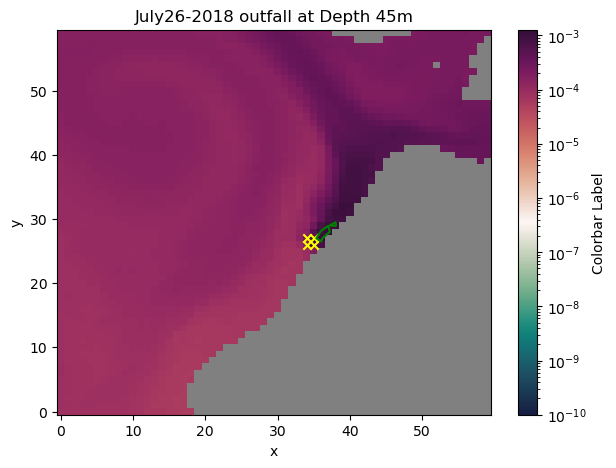

In [7]:
planview(data, 'outfall', 0, 23, cm_vel)

In [8]:
def verticalview(base, field, it, dep, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  # width of domain plotted
    data = base[field][it, :29, dep, 250+iz:350-iz]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.x, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.contour(data.x, data.deptht, data.values, levels=[contour_value], colors='green')
    axs.invert_yaxis()
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('depth')
    axs.set_title(f'July26-2018 {field} at Depth 45m')
    if dep == 446:
        axs.scatter(304 - 270, 98, marker = 'x', color = 'yellow')
        axs.scatter(305 - 270, 76, marker = 'x', color = 'yellow')
    else: 
        axs.scatter(304 - 270, 121, marker = 'x', color = 'yellow')
        axs.scatter(305 - 270, 98, marker = 'x', color = 'yellow')

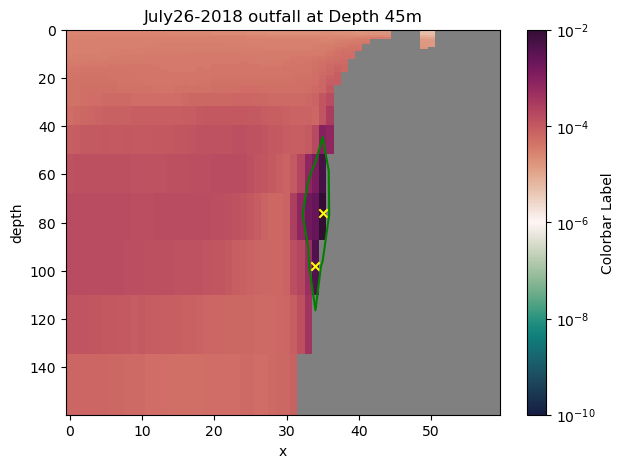

In [9]:
verticalview(data, 'outfall', 0, 446, cm_vel)

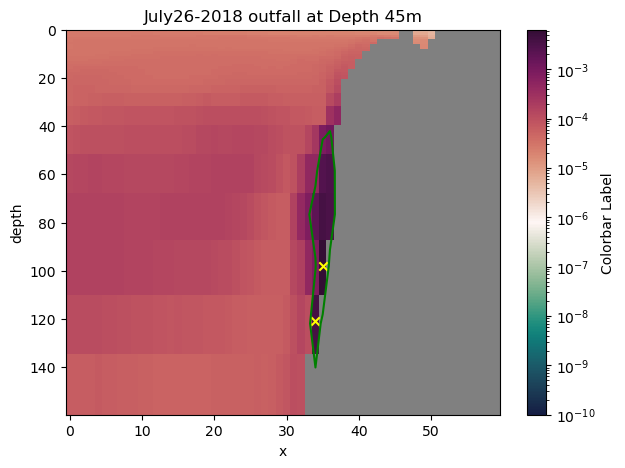

In [10]:
verticalview(data, 'outfall', 0, 447, cm_vel)

In [11]:
def vertical_view_x(base, field, it, dep,  cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  # width of domain plotted
    data = base[field][it, :29, 400+iz:500-iz, dep]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.y, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.contour(data.y, data.deptht, data.values, levels=[contour_value], colors='green')
    axs.invert_yaxis() 
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('y')
    axs.set_ylabel('log-depth')
    axs.set_title(f'July26-2018 {field} at Depth 45m')
    if dep == 304:
        axs.scatter(447 - 420, 121, marker = 'x', color = 'yellow')
        axs.scatter(446 - 420, 98, marker = 'x', color = 'yellow')
    else:
        axs.scatter(447 - 420, 98, marker = 'x', color = 'yellow')
        axs.scatter(446 - 420, 76, marker = 'x', color = 'yellow')

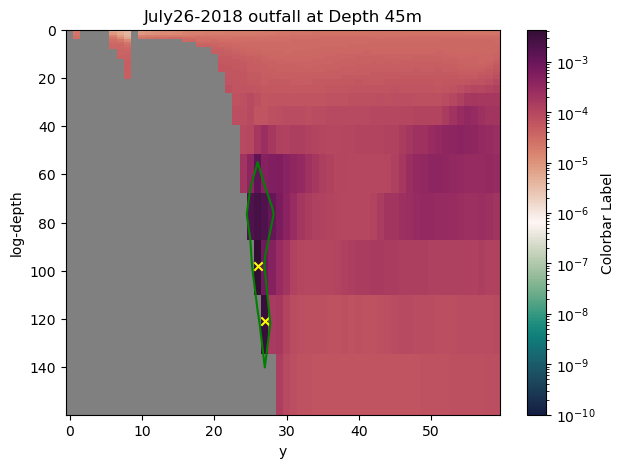

In [12]:
vertical_view_x(data, 'outfall', 0, 304,  cm_vel)

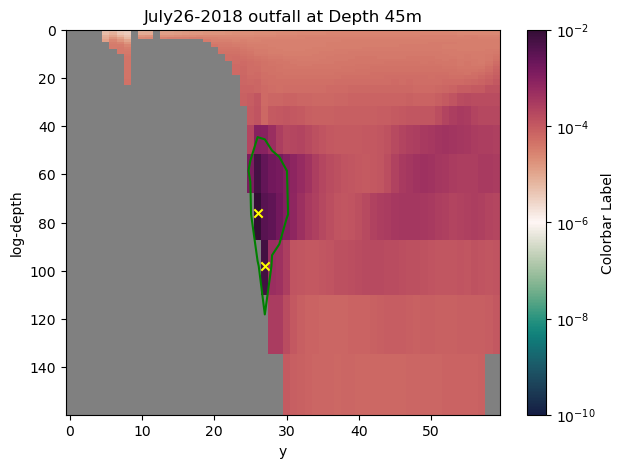

In [13]:
vertical_view_x(data, 'outfall', 0, 305,  cm_vel)

In [7]:
file_pattern = '/data/sallen/results/MEOPAR/wastewater/long_run/*jul18/SalishSea_1d_201807[0-3][0-9]_201807[0-3][0-9]_grid_T.nc'
file_list = glob.glob(file_pattern)

jul31 = xr.open_mfdataset(file_list, data_vars=['outfall'])  
jul31

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 31)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2018-07-01T12:00:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    bounds_nav_lat        (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    area                  (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(40, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    sigma_theta           (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    e3t                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    outfall               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20180701_20180731_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-24 15:28:37 GMT
    uuid:         2d2b91e6-7345-4f8b-9498-4bde3227cbf6

In [8]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
data_slice = jul31.isel(y = y_slice, x = x_slice) 

In [7]:
def plotAvgDiffTime(new, field, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    offset = 1e-10
    norm_data = colors.LogNorm(vmin=new[field].values.min() + offset, vmax=new[field].values.max() + offset)
    new_avg = (new[field] * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
    new_avg.plot(ax=axs, y = "deptht", yincrease = False, cmap=cmp, norm = norm_data, shading='auto')
    max_depth = new_avg.argmax(dim = 'deptht')
    axs.plot(new_avg['time_counter'], new_avg['deptht'][max_depth], 'y-')
    axs.set_ylim(150, 0)

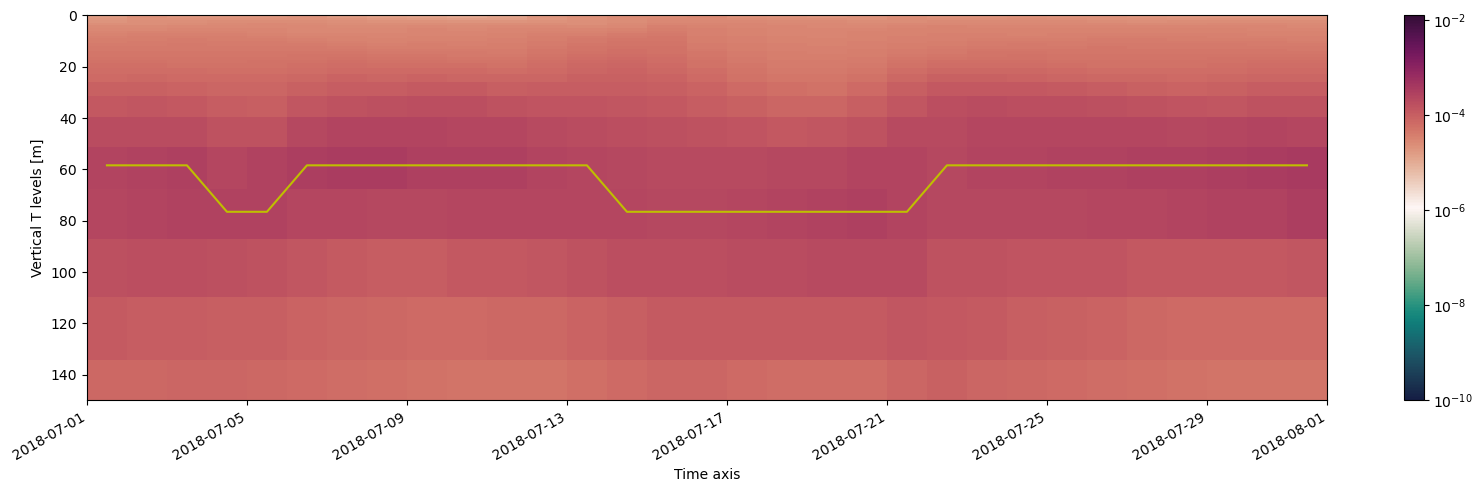

In [8]:
plotAvgDiffTime(data_slice, 'outfall', cm_vel)

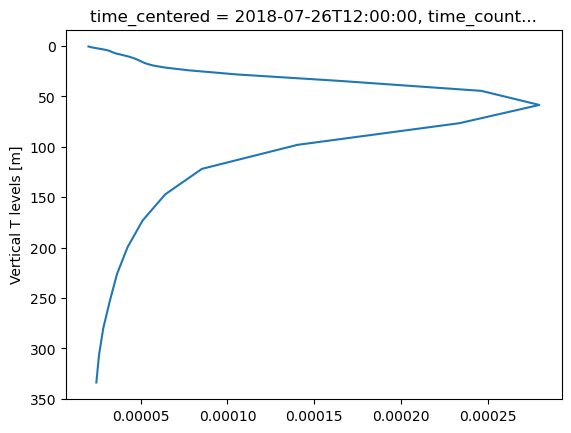

In [9]:
new_avg = (data_slice['outfall'] * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
new_avg[25,:].plot(y = 'deptht', yincrease = False)

In [9]:
scale = 40
zdepth = np.zeros_like(meshmask.gdepw_0[0, 0, ii-scale:ii+scale ,jj-scale:jj+scale])
for si, id in enumerate(range(ii-scale, ii+scale)):
    for sj, jd in enumerate(range(jj-scale, jj+scale)):
        zdepth[si, sj] = meshmask.gdepw_0[0, mbathy[id, jd].values, id, jd]

/tmp/ipykernel_1960662/2217099850.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colours = axs[0,0].pcolormesh(meshmask.nav_lon[ii-scale:ii+scale, jj-scale:jj+scale],


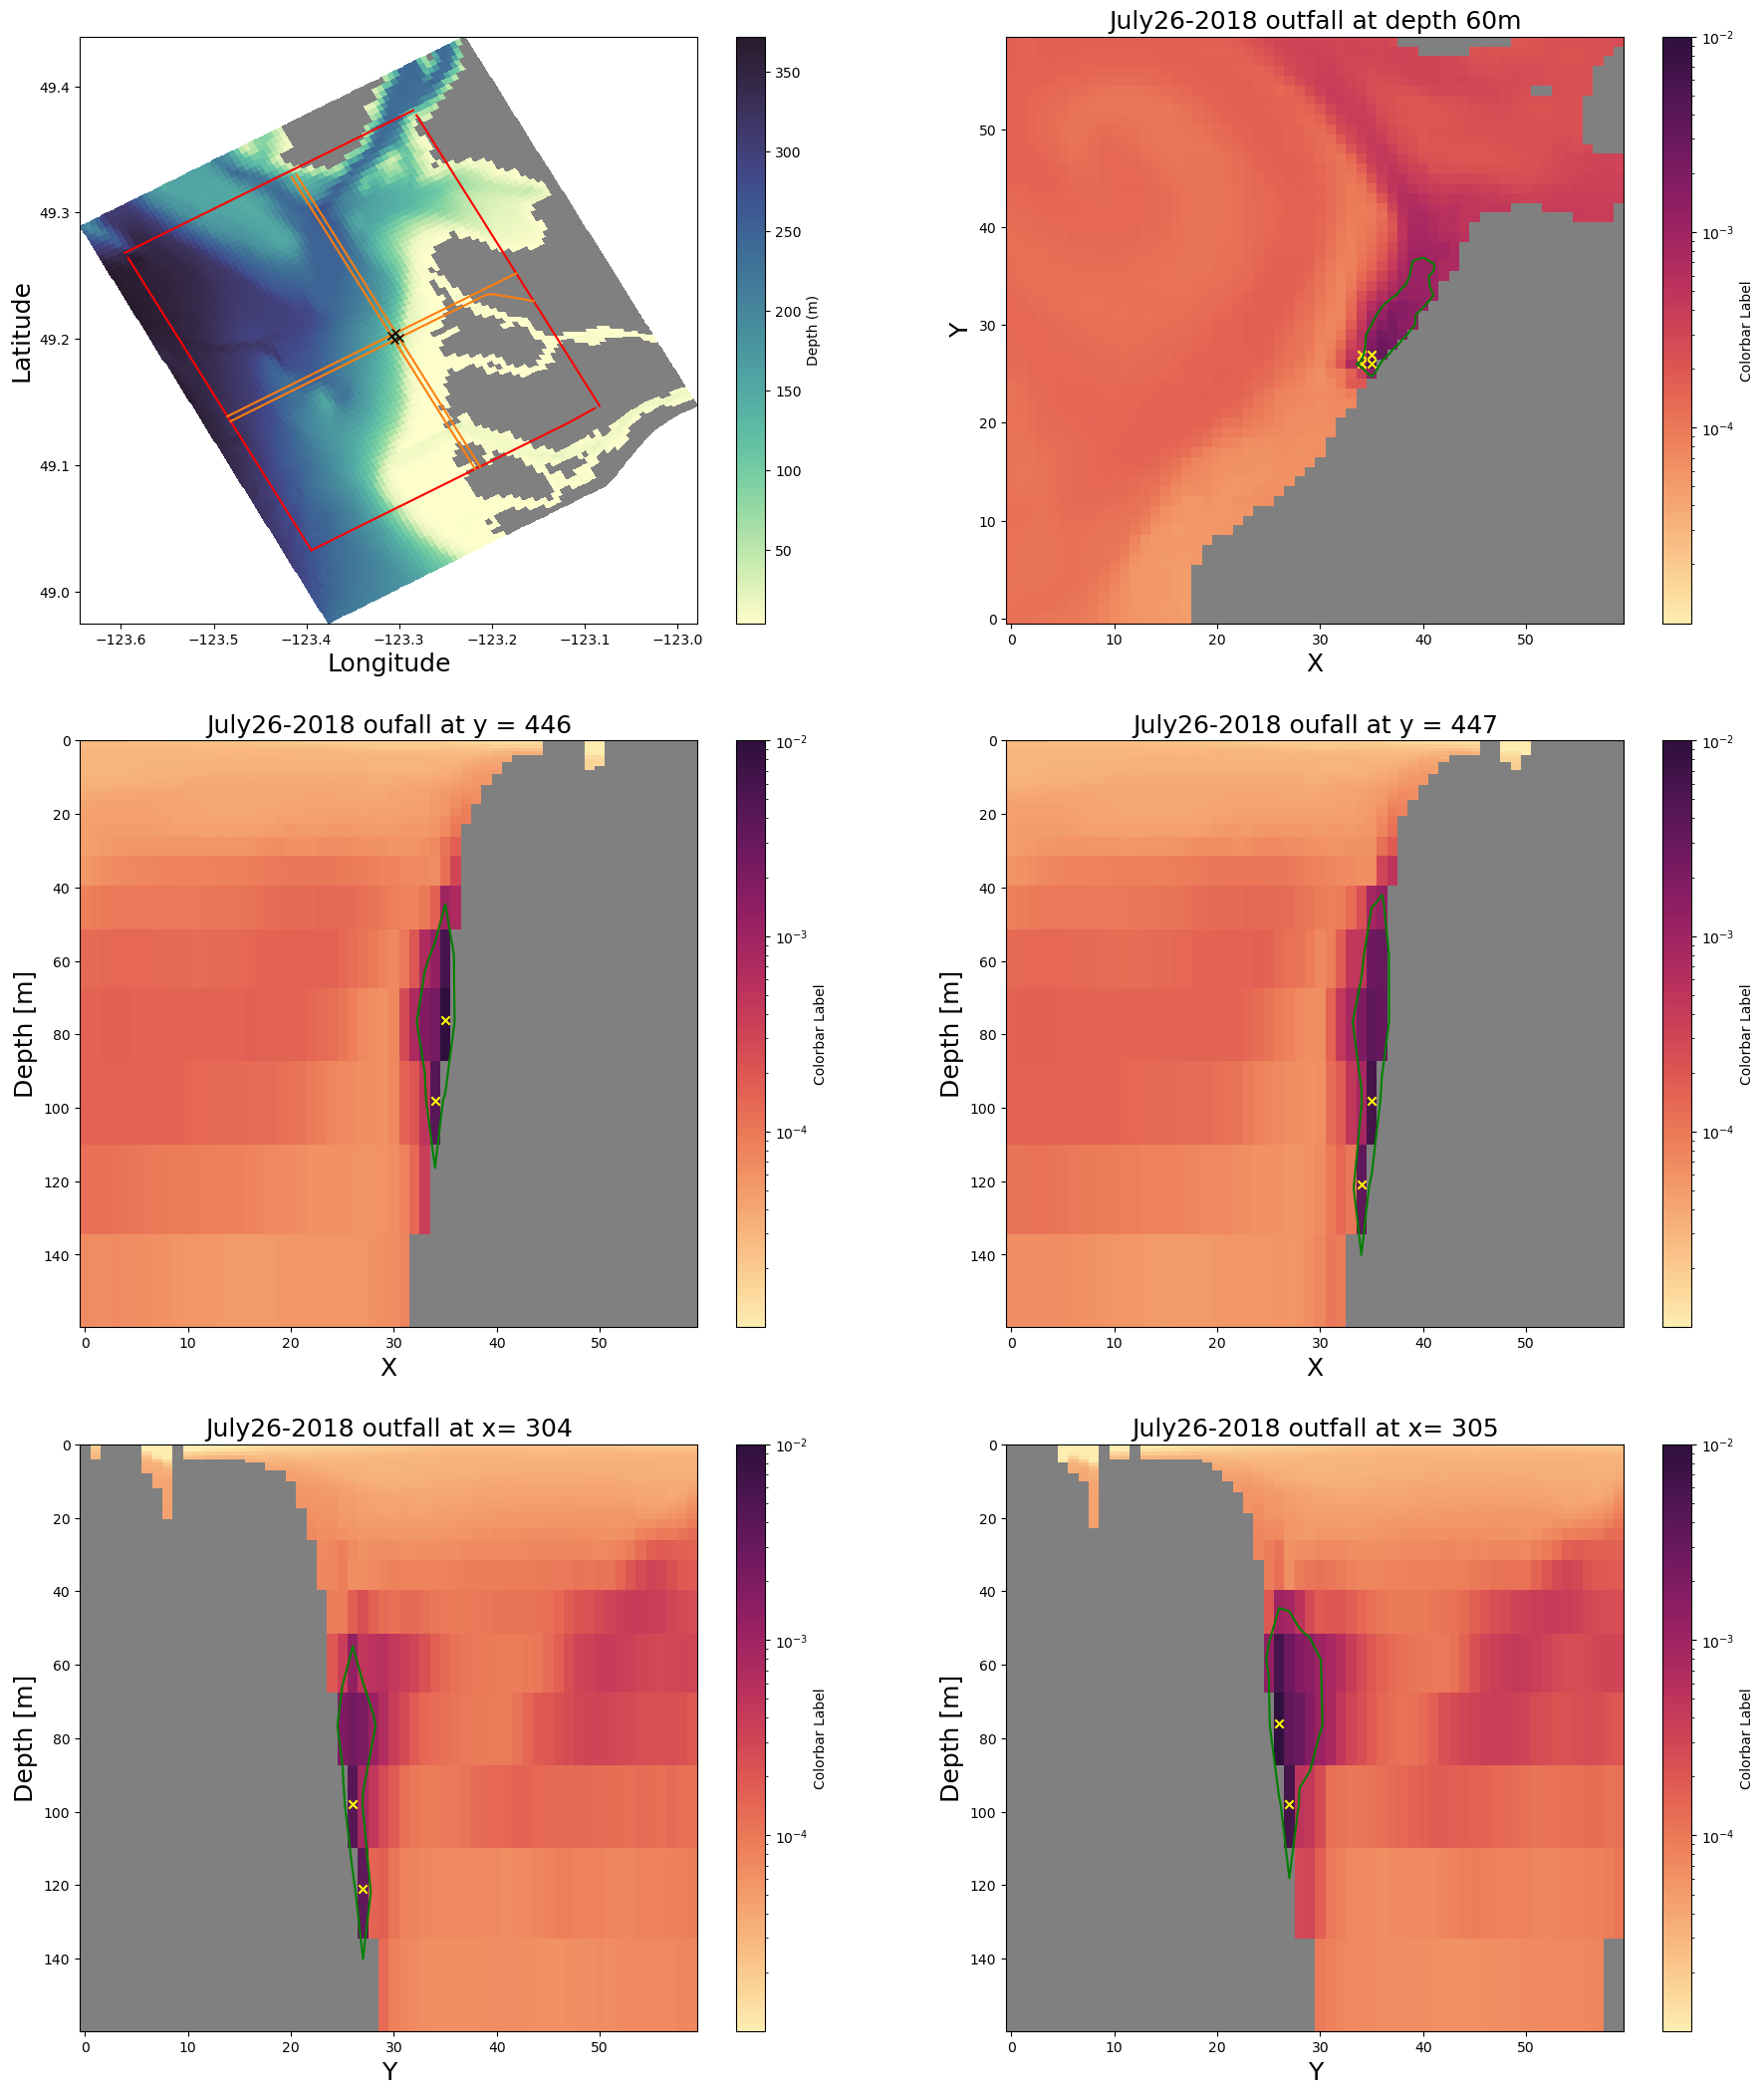

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(22, 26))
scale = 40
iz = 20
colours = axs[0,0].pcolormesh(meshmask.nav_lon[ii-scale:ii+scale, jj-scale:jj+scale], 
               meshmask.nav_lat[ii-scale:ii+scale, jj-scale:jj+scale],
               np.ma.array(zdepth, mask = 1-tmask[0, ii-scale:ii+scale, jj-scale:jj+scale]), cmap=cm_deep)
axs[0,0].plot(meshmask.nav_lon[imin:imax, jmin], meshmask.nav_lat[imin:imax, jmin], 'r')
axs[0,0].plot(meshmask.nav_lon[imin:imax, jmax], meshmask.nav_lat[imin:imax, jmax], 'r')
axs[0,0].plot(meshmask.nav_lon[imin, jmin:jmax], meshmask.nav_lat[imin, jmin:jmax], 'r')
axs[0,0].plot(meshmask.nav_lon[imax, jmin:jmax+1], meshmask.nav_lat[imax, jmin:jmax+1], 'r')
axs[0,0].plot(meshmask.nav_lon[xcy, jmin:jmax+1], meshmask.nav_lat[xcy, jmin:jmax+1], color='tab:orange')
axs[0,0].plot(meshmask.nav_lon[446, jmin:jmax+1], meshmask.nav_lat[446, jmin:jmax+1], color='tab:orange')
axs[0,0].plot(meshmask.nav_lon[imin:imax, ycx], meshmask.nav_lat[imin:imax, ycx], 'tab:orange')
axs[0,0].plot(meshmask.nav_lon[imin:imax, 304], meshmask.nav_lat[imin:imax, 304], 'tab:orange')


axs[0,0].plot(meshmask.nav_lon[446:448, 304:306], meshmask.nav_lat[446:448, 304:306], 'kx')
axs[0,0].set_ylabel('Latitude', fontsize = 18)
axs[0,0].set_xlabel('Longitude', fontsize = 18)
cb = fig.colorbar(colours, ax=axs[0,0])
cb.set_label('Depth (m)')


datap = data['outfall'][0, 24, 400+iz:500-iz, 250+iz:350-iz]
offset = 1e-10
contour_value = 1e-3 
norm_datap = colors.LogNorm(vmin=1e-5 + offset, vmax=1e-2)
pc = axs[0,1].pcolormesh(datap.x, datap.y, datap.values, cmap=cm_matter, norm = norm_datap)
# Mask where tmask is False
pc.set_array(datap.values.ravel())  # Set array to the data values
axs[0,1].contour(datap.x, datap.y, datap.values, levels=[contour_value], colors='green')
# Add colorbar for reference
cbar = plt.colorbar(pc, ax=axs[0,1], label='Colorbar Label')
# Set labels and title
axs[0,1].set_xlabel('X', fontsize = 18)
axs[0,1].set_ylabel('Y', fontsize = 18)
axs[0,1].set_title(f'July26-2018 outfall at depth 60m', fontsize = 18)
axs[0,1].scatter(304 - 270, 446 - 420, marker = 'x', color = 'yellow')
axs[0,1].scatter(304 - 270, 447 - 420, marker = 'x', color = 'yellow')
axs[0,1].scatter(305 - 270, 446 - 420, marker = 'x', color = 'yellow')
axs[0,1].scatter(305 - 270, 447 - 420, marker = 'x', color = 'yellow')

datay446 = data['outfall'][0, :29, 446, 250+iz:350-iz]
offset = 1e-10
contour_value = 1e-3 
norm_data_446 = colors.LogNorm(vmin=1e-5 + offset, vmax=1e-2)
pc = axs[1, 0].pcolormesh(datay446.x, datay446.deptht, datay446.values, cmap=cm_matter, norm = norm_data_446, shading='auto')
pc.set_array(datay446.values.ravel())  # Set array to the data values
axs[1, 0].contour(datay446.x, datay446.deptht, datay446.values, levels=[contour_value], colors='green')
axs[1, 0].invert_yaxis()
cbar = plt.colorbar(pc, ax=axs[1,0], label='Colorbar Label')
axs[1, 0].set_xlabel('X', fontsize = 18)
axs[1, 0].set_ylabel('Depth [m]', fontsize = 18)
axs[1, 0].set_title(f'July26-2018 oufall at y = 446', fontsize = 18)

axs[1, 0].scatter(304 - 270, 98, marker = 'x', color = 'yellow')
axs[1, 0].scatter(305 - 270, 76, marker = 'x', color = 'yellow')

datay447 = data['outfall'][0, :29, 447, 250+iz:350-iz]
offset = 1e-10
contour_value = 1e-3 
norm_data_447 = colors.LogNorm(vmin=1e-5 + offset, vmax=1e-2)
pc = axs[1, 1].pcolormesh(datay447.x, datay447.deptht, datay447.values, cmap=cm_matter, norm = norm_data_447, shading='auto')
pc.set_array(datay447.values.ravel())  # Set array to the data values
axs[1, 1].contour(datay447.x, datay447.deptht, datay447.values, levels=[contour_value], colors='green')
axs[1, 1].invert_yaxis()
cbar = plt.colorbar(pc, ax=axs[1,1], label='Colorbar Label')
axs[1, 1].set_xlabel('X', fontsize = 18)
axs[1, 1].set_ylabel('Depth [m]', fontsize = 18)
axs[1, 1].set_title(f'July26-2018 oufall at y = 447', fontsize = 18)

axs[1, 1].scatter(304 - 270, 121, marker = 'x', color = 'yellow')
axs[1, 1].scatter(305 - 270, 98, marker = 'x', color = 'yellow')

data_304 = data['outfall'][0, :29, 400+iz:500-iz, 304]
offset = 1e-10
contour_value = 1e-3 
norm_data_304 = colors.LogNorm(vmin=1e-5 + offset, vmax=1e-2)
pc = axs[2,0].pcolormesh(data_304.y, data_304.deptht, data_304.values, cmap=cm_matter, norm = norm_data_304, shading='auto')
pc.set_array(data_304.values.ravel())  # Set array to the data values
axs[2,0].contour(data_304.y, data_304.deptht, data_304.values, levels=[contour_value], colors='green')
axs[2,0].invert_yaxis() 
cbar = plt.colorbar(pc, ax=axs[2,0], label='Colorbar Label')
axs[2,0].set_xlabel('Y', fontsize = 18)
axs[2,0].set_ylabel('Depth [m]' , fontsize = 18)
axs[2,0].set_title(f'July26-2018 outfall at x= 304', fontsize = 18)

axs[2,0].scatter(447 - 420, 121, marker = 'x', color = 'yellow')
axs[2,0].scatter(446 - 420, 98, marker = 'x', color = 'yellow')

data_305 = data['outfall'][0, :29, 400+iz:500-iz, 305]
offset = 1e-10
contour_value = 1e-3 
norm_data_305 = colors.LogNorm(vmin=1e-5 + offset, vmax=1e-2)
pc = axs[2,1].pcolormesh(data_305.y, data_305.deptht, data_305.values, cmap=cm_matter, norm = norm_data_305, shading='auto')
pc.set_array(data_305.values.ravel())  # Set array to the data values
axs[2,1].contour(data_305.y, data_305.deptht, data_305.values, levels=[contour_value], colors='green')
axs[2,1].invert_yaxis() 
cbar = plt.colorbar(pc, ax=axs[2,1], label='Colorbar Label')
axs[2,1].set_xlabel('Y', fontsize = 18)
axs[2,1].set_ylabel('Depth [m]', fontsize = 18)
axs[2,1].set_title(f'July26-2018 outfall at x= 305', fontsize = 18)

axs[2,1].scatter(447 - 420, 98, marker = 'x', color = 'yellow')
axs[2,1].scatter(446 - 420, 76, marker = 'x', color = 'yellow')
fig.savefig('outfall26July2018.png', dpi=300)





